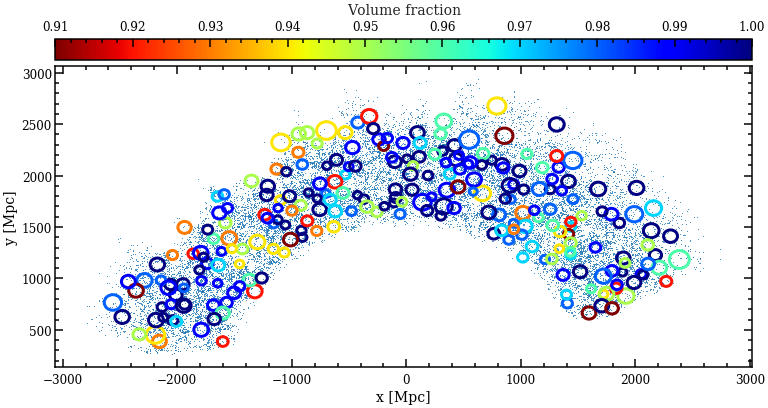

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
%matplotlib inline
plt.style.use('enrique')

def draw_circle(ax, x, y, r, color='w', alpha=1.0, linestyle='solid',
                linewidth=1.0):
    circle = plt.Circle((x, y), radius=r, color=color, alpha=alpha)
    ax.add_artist(circle)
    circle.set_facecolor('none')
    circle.set_linewidth(linewidth)
    circle.set_linestyle(linestyle)


fig = plt.figure(figsize=(11,6))
ax = plt.subplot()

data = np.load('/home/epaillasv/data/eboss_v5/galaxy_cats/\
eBOSS_LRG_clustering_NGC_v5.dat.car.npy')
data = np.asarray([i for i in data if 1500 < i[2] < 1700])
ax.scatter(data[:,0], data[:,1], s=1.0, linewidth=0)

data = np.genfromtxt('/home/epaillasv/data/eboss_v5/void_cats/\
eBOSS_LRG_clustering_NGC_v5.step1.vol90.car.txt')
volfrac = np.genfromtxt('/home/epaillasv/data/eboss_v5/void_cats/\
eBOSS_LRG_clustering_NGC_v5.step1.vol90.volfrac')

ind = (1500 < data[:,2]) & (data[:,2] < 1700) & (volfrac > 0.9)
data = data[ind]
volfrac = volfrac[ind]

norm = plt.Normalize()
colors = plt.cm.jet_r(norm(volfrac))
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet_r, norm=norm)
sm._A = []

for i in range(len(data)):
    draw_circle(ax=ax, x=data[i,0], y=data[i,1],
    r=data[i,3], color=colors[i], alpha=1.0, linewidth=3.0)

# for void in data:
#     draw_circle(ax=ax, x=void[0], y=void[1], r=void[3], color='k',
#     alpha=1.0, linewidth=3.0)


ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("top", size="7%", pad="2%")
cbar = plt.colorbar(sm, cax, orientation='horizontal')
cax.xaxis.set_ticks_position("top")
cbar.ax.set_title('Volume fraction')
plt.tight_layout()
plt.show()

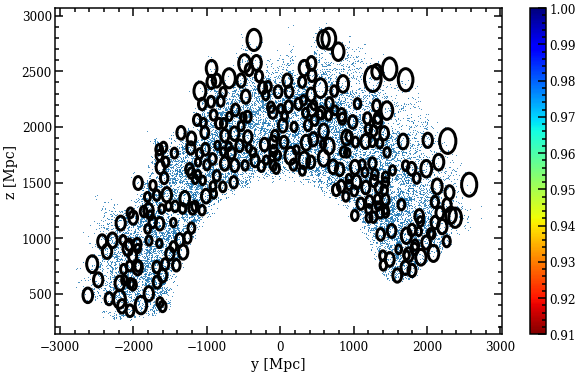

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('enrique')

def draw_circle(ax, x, y, r, color='w', alpha=1.0, linestyle='solid',
                linewidth=1.0):
    circle = plt.Circle((x, y), radius=r, color=color, alpha=alpha)
    ax.add_artist(circle)
    circle.set_facecolor('none')
    circle.set_linewidth(linewidth)
    circle.set_linestyle(linestyle)


fig = plt.figure(figsize=(10,6))
ax = plt.subplot()

data = np.load('/home/epaillasv/data/eboss_v5/galaxy_cats/\
eBOSS_LRG_clustering_NGC_v5.dat.car.npy')
data = np.asarray([i for i in data if 1500 < i[2] < 1700])
ax.scatter(data[:,0], data[:,1], s=1.0, linewidth=0)

data = np.genfromtxt('/home/epaillasv/data/eboss_v5/void_cats/\
eBOSS_LRG_clustering_NGC_v5.step1.vol90.car.txt')


ind = (1500 < data[:,2]) & (data[:,2] < 1700)
data = data[ind]

for i in range(len(data)):
    draw_circle(ax=ax, x=data[i,0], y=data[i,1],
    r=data[i,3], color='k', alpha=1.0, linewidth=3.0)

# for void in data:
#     draw_circle(ax=ax, x=void[0], y=void[1], r=void[3], color='k',
#     alpha=1.0, linewidth=3.0)


ax.set_xlabel('y [Mpc]')
ax.set_ylabel('z [Mpc]')
plt.colorbar(sm)
plt.show()